In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X,y=mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

(-0.5, 27.5, 27.5, -0.5)

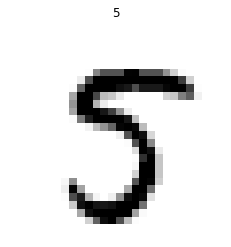

In [5]:
i=random.randint(0,70000)
some_digit = X[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.title(y[i])
plt.axis("off")

In [5]:
Xtrain,Xtest,ytrain,ytest=X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
shuffle_index=np.random.permutation(60000)

In [7]:
Xtrain,ytrain=Xtrain[shuffle_index],ytrain[shuffle_index]

In [9]:
ytrain5=(ytrain=='5')# Identifies 5s only

In [10]:
ytest5=(ytest=='5')

In [11]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(Xtrain,ytrain5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

(-0.5, 27.5, 27.5, -0.5)

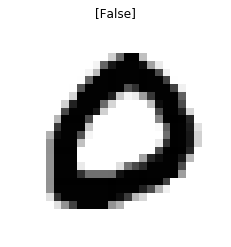

In [12]:
i=random.randint(0,60000)
some_digit = Xtrain[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.title(str(sgd_clf.predict([some_digit])))
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

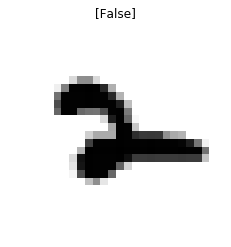

In [13]:
i=random.randint(0,60000)
some_digit = Xtrain[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.title(str(sgd_clf.predict([some_digit])))
plt.axis("off")

In [14]:
cross_val_score(sgd_clf,Xtrain,ytrain5,cv=3,scoring='accuracy')

array([0.96005, 0.95925, 0.9651 ])

In [16]:
ytrainpred=cross_val_predict(sgd_clf,Xtrain,ytrain5,cv=5)

In [19]:
confusion_matrix(ytrain5,ytrainpred)

array([[52878,  1701],
       [ 1146,  4275]], dtype=int64)

In [22]:
precision_score(ytrain5,ytrainpred)

0.7153614457831325

In [23]:
recall_score(ytrain5,ytrainpred)

0.7885998893193138

In [25]:
f1_score(ytrain5,ytrainpred)

0.7501974203737826

In [29]:
i=random.randint(0,60000)
some_digit = Xtrain[i]
y_scores=sgd_clf.decision_function([some_digit])
sgd_clf.predict([some_digit])

array([False])

In [30]:
y_scores

array([-3022.94421277])

In [32]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [33]:
threshold=-3100.
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [36]:
y_scores=cross_val_predict(sgd_clf,Xtrain,ytrain5,cv=3,method='decision_function')

In [44]:
precision,recalls,thresholds=precision_recall_curve(ytrain5,y_scores)

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

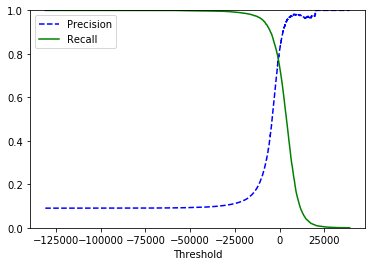

In [45]:
plot_precision_recall_vs_threshold(precision, recalls, thresholds)

In [79]:
ytrain_pred_90=(y_scores>1900)

In [80]:
precision_score(ytrain5,ytrain_pred_90)

0.8994529825475385

In [81]:
recall_score(ytrain5,ytrain_pred_90)

0.636967349197565

In [8]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

(-0.5, 27.5, 27.5, -0.5)

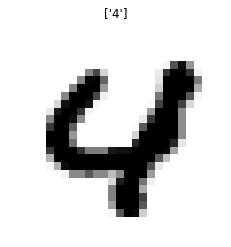

In [9]:
i=random.randint(0,60000)
some_digit = Xtrain[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.title(str(sgd_clf.predict([some_digit])))
plt.axis("off")

In [10]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-25399.70394898, -56214.62523794, -12294.09114464,
        -26928.84354194,   3395.07471871, -10398.99785581,
        -25612.56288776,  -8519.05985281,  -1606.3446335 ,
        -14946.8634373 ]])

In [11]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

'4'

In [12]:
cross_val_score(sgd_clf,Xtrain,ytrain,cv=3,scoring='accuracy')

array([0.8862, 0.8628, 0.8652])